In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("libraries imported!")

libraries imported!


In [37]:
df=pd.read_csv("farmer.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [38]:
df.to_csv("farmer.csv",index=False)

In [39]:
df["label"].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [40]:
group=df.groupby('label')

In [41]:
group[['N']].mean()


,N
label,
apple,20.80
banana,100.23
blackgram,40.02
chickpea,40.09
coconut,21.98
coffee,101.20
cotton,117.77
grapes,23.18
jute,78.40


In [42]:
group[['temperature']].mean()

,temperature
label,
apple,22.630942
banana,27.376798
blackgram,29.973340
chickpea,18.872847
coconut,27.409892
coffee,25.540477
cotton,23.988958
grapes,23.849575
jute,24.958376


In [43]:
n=group['N'].agg(minimum= "min",maximum="max",average="mean")
n

,minimum,maximum,average
label,,,
apple,0,40,20.80
banana,80,120,100.23
blackgram,20,60,40.02
chickpea,20,60,40.09
coconut,0,40,21.98
coffee,80,120,101.20
cotton,100,140,117.77
grapes,0,40,23.18
jute,60,100,78.40


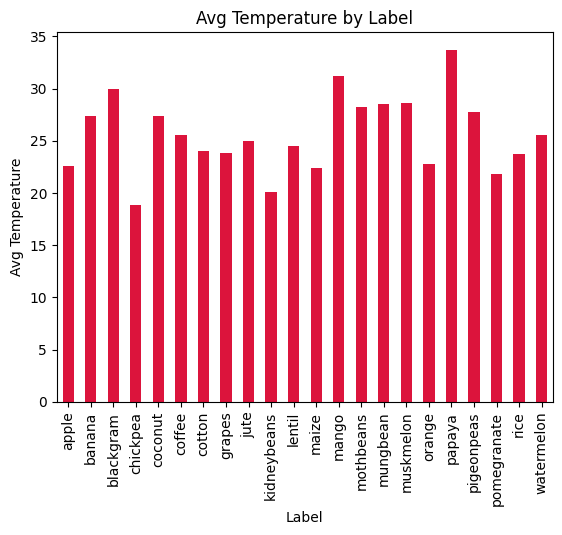

In [44]:
min_temperature = group['temperature'].mean()
min_temperature.plot.bar(color='crimson')

plt.xlabel('Label')
plt.ylabel('Avg Temperature')
plt.title('Avg Temperature by Label')

plt.show()

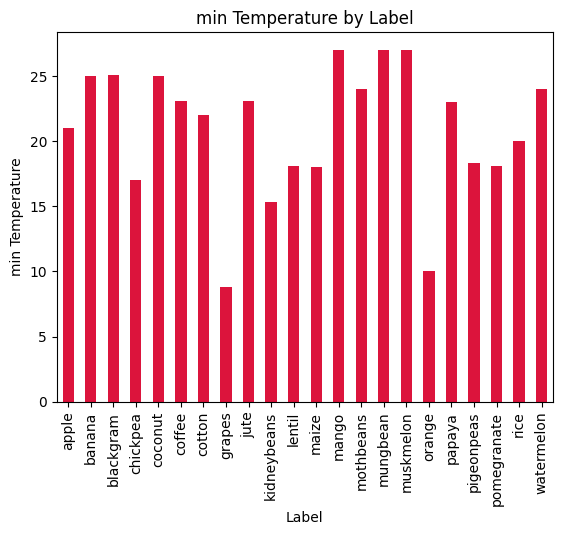

In [45]:
min_temperature = group['temperature'].min()
min_temperature.plot.bar(color='crimson')

plt.xlabel('Label')
plt.ylabel('min Temperature')
plt.title('min Temperature by Label')

plt.show()

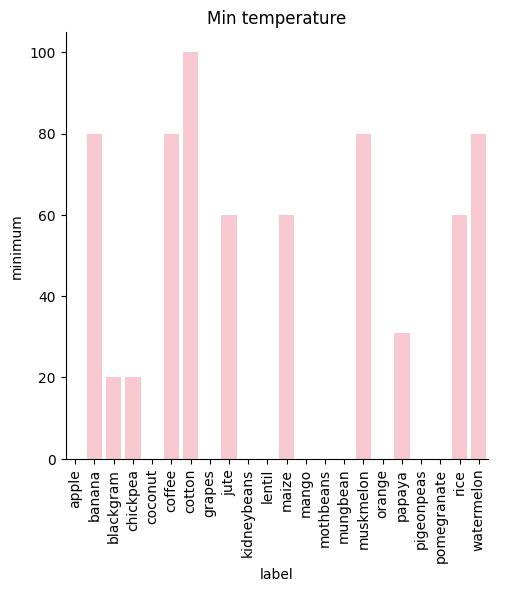

In [46]:
# EDA :exploratory data
sns.catplot(x='label', y='minimum', data=n, kind='bar', color="pink")
plt.xticks(rotation=90)
plt.title("Min temperature")
plt.show()

make all plotes 

In [47]:
x=df.drop(["label"],axis=1) 

In [48]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [49]:
x.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [51]:
x.duplicated().sum()

np.int64(0)

In [52]:
x.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
dtype: object

<Axes: xlabel='temperature', ylabel='Density'>

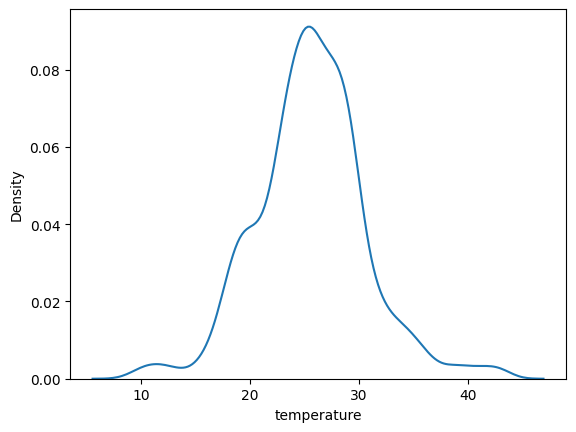

In [53]:
sns.kdeplot(x["temperature"])

<Axes: ylabel='N'>

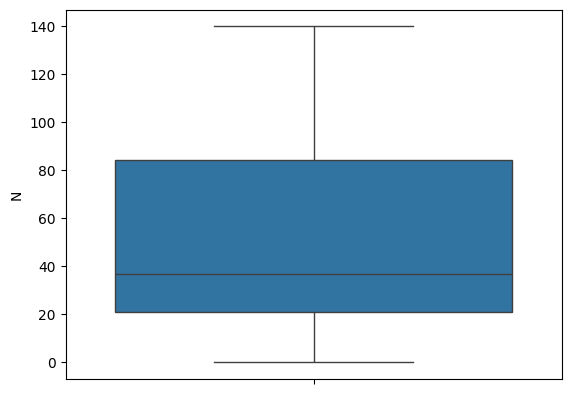

In [54]:
sns.boxplot(x["N"])

<Axes: ylabel='N'>

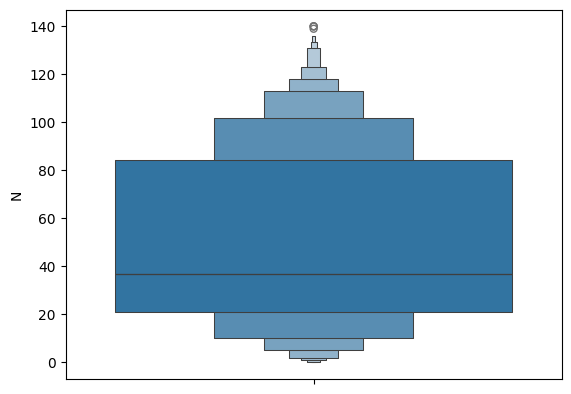

In [55]:
sns.boxenplot(x["N"])

Data scalling to convert numericals in a range by removing outliers ( that are some different from whole data ,show by box plot), this is as Kmeans algorithm

## Data Scale down

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
std_scaler=StandardScaler()
x_transformed = std_scaler.fit_transform(x)

z-score formula = (Xi - ū)/σ 

In [58]:
x_transformed

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [59]:
pd.DataFrame(x_transformed)

,0,1,2,3,4,5,6
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


:: forth column is of temperature column 

<Axes: xlabel='3', ylabel='Density'>

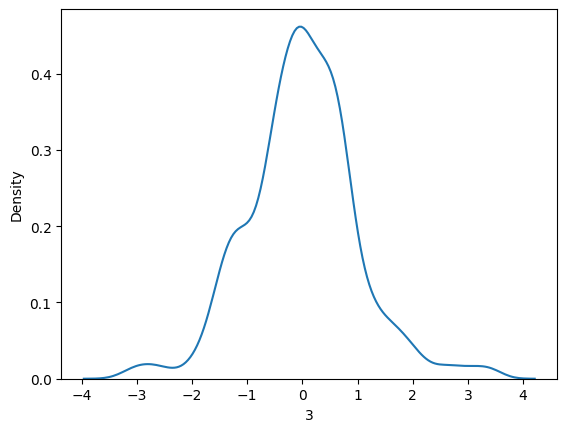

In [60]:
sns.kdeplot(pd.DataFrame(x_transformed)[3])   # on scalled down data 

in scalled down data outliers get hided.

data should be scalled down before KMeans algorithm apply,  otherwise accuracy loss occurs.

<Axes: xlabel='temperature', ylabel='Density'>

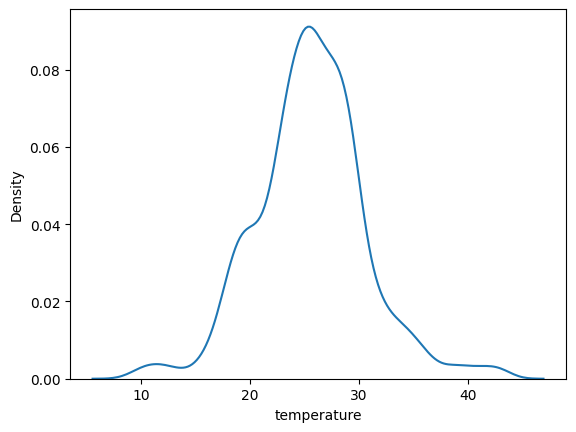

In [35]:
sns.kdeplot(x["temperature"])  #without scalled down data

after scalled down data is ready to be train .  is has no duplicates, no null values and no outliers 

In [62]:
from sklearn.cluster import KMeans   # it divides the data in groups

In [63]:
kmeans_obj=KMeans()

In [64]:
lables= kmeans_obj.fit_predict(x_transformed)   # algorithm trained and get prediction as lables

In [65]:
lables

array([3, 3, 3, ..., 3, 2, 2], dtype=int32)

In [68]:
set(lables)

{np.int32(0),
 np.int32(1),
 np.int32(2),
 np.int32(3),
 np.int32(4),
 np.int32(5),
 np.int32(6),
 np.int32(7)}

In [69]:
lables.shape

(2200,)

In [70]:
x_transformed.shape

(2200, 7)

In [71]:
df["cluster_no"]=lables

In [74]:
df.head(40)

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,3
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,3
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,3
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,3
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,3
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice,3
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice,3
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice,3
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice,3
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice,3


In [75]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,3
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,2
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,3
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,2
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,2


In [78]:
df[df["cluster_no"]==3]

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,3
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,3
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,3
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,3
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,3
...,...,...,...,...,...,...,...,...,...
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee,3
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee,3
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee,3
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,3


In [82]:
df[df["cluster_no"]==3]["label"].unique()

array(['rice', 'pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee'],
      dtype=object)

In [83]:
df[df["cluster_no"]==6]["label"].unique()

array(['watermelon', 'muskmelon'], dtype=object)

In [84]:
df[df["cluster_no"]==1]["label"].unique()

array(['grapes', 'apple'], dtype=object)

In [85]:
df[df["cluster_no"]==2]["label"].unique()

array(['maize', 'lentil', 'banana', 'papaya', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [86]:
df[df["cluster_no"]==4]["label"].unique()

array(['pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil',
       'mango', 'orange', 'papaya'], dtype=object)

In [87]:
df[df["cluster_no"]==5]["label"].unique()

array(['chickpea', 'kidneybeans', 'pigeonpeas', 'lentil'], dtype=object)

In [88]:
df[df["cluster_no"]==7]["label"].unique()

array(['pigeonpeas', 'mothbeans', 'lentil', 'mango'], dtype=object)

In [89]:
import os,joblib
os.makedirs("models",exist_ok=True)
joblib.dump(std_scaler,"./models/std_scaler.lb")
joblib.dump(kmeans_obj,"./models/kmeans_model.lb")


['./models/kmeans_model.lb']

In [90]:
df[["label","cluster_no"]].to_csv("./models/filter_crops.csv",index=False)